In [10]:
#import necessary libraries
import tensorflow as tf
import keras
from keras import layers

### Autoencoder on MNIST dataset

### Fully connected autoencoder

In [42]:
#declare a size for the bottleneck
encoding_dim = 32 #compression of factor 24.5, assuming the input is 784 floats (28 by 28 pixels)

#input image size
input_img = keras.Input(shape=(784,))

#encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

#lossy representation of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

#Main model that maps input to output
autoencoder = keras.Model(input_img, decoded)

In [43]:
#mapping input to its encoded representation through a separate encoder model
encoder = keras.Model(input_img, encoded)

In [44]:
#creating a separate decoder 
encoded_input = keras.Input(shape=(encoding_dim,))
#retrieve the last layer of the autoencoder model
decoded_layer = autoencoder.layers[-1]
#create the decoder model
decoder = keras.Model(encoded_input, decoded_layer(encoded_input))

In [45]:
#confidure the model to use a per=pixel binary cross entropy loss, and the Adam optimizer
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [46]:
#import the MNIST dataset and discard the labels since it is not needed
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [47]:
#normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [48]:
#train autoencoder for 50 epochs
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2751 - val_loss: 0.1885
Epoch 2/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1702 - val_loss: 0.1535
Epoch 3/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1443 - val_loss: 0.1333
Epoch 4/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1282 - val_loss: 0.1211
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1181 - val_loss: 0.1128
Epoch 6/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1113 - val_loss: 0.1075
Epoch 7/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1064 - val_loss: 0.1031
Epoch 8/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1028 - val_loss: 0.0999
Epoch 9/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1001 - val_loss: 0.0976
Epoch 10/50
235/235 [==============================] - 4s 19ms/step - loss: 0.0981 - val_lo

In [49]:
#encode and decode some digits from the test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
encoded_imgs.mean() #check the sparsity of encoded models

8.705996

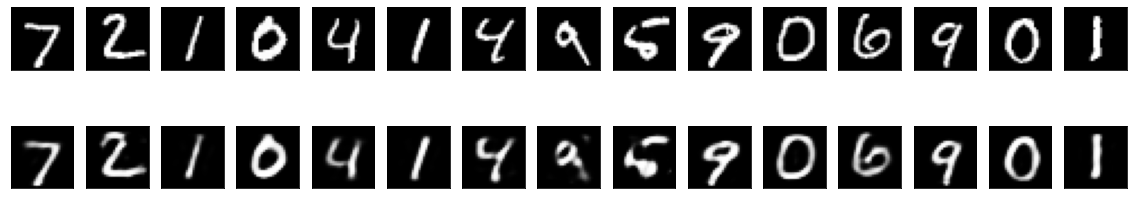

In [41]:
import matplotlib.pyplot as plt

n = 15 #number of images to display
plt.figure(figsize=(20,4))
for i in range(n):
  #display original images
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #display reconstruced images
  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False) 

plt.show()

### Adding sparity constarint to the encoded representations

In the previous example, the representations were only constrained by the size of the hidden layer (32). In such a situation, what typically happens is that the hidden layer is learning an approximation of PCA (principal component analysis). But another way to constrain the representations to be compact is to add a sparsity contraint on the activity of the hidden representations, so fewer units would "fire" at a given time. In Keras, this can be done by adding an activity_regularizer to our Dense layer

In [29]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
#add a activity regularizer ro thr enocded layer
encoded = layers.Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [31]:
#mapping input to its encoded representation through a separate encoder model
encoder = keras.Model(input_img, encoded)

In [32]:
#creating a separate decoder 
encoded_input = keras.Input(shape=(encoding_dim,))
#retrieve the last layer of the autoencoder model
decoded_layer = autoencoder.layers[-1]
#create the decoder model
decoder = keras.Model(encoded_input, decoded_layer(encoded_input))

In [33]:
#confidure the model to use a per=pixel binary cross entropy loss, and the Adam optimizer
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [35]:
#train autoencoder for 50 epochs
autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test, x_test))
#100 epochs beacuse with the added regularization the model is less likely to overfit and can be trained longe

Epoch 1/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1287 - val_loss: 0.1236
Epoch 2/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1220 - val_loss: 0.1180
Epoch 3/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1172 - val_loss: 0.1139
Epoch 4/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1137 - val_loss: 0.1109
Epoch 5/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1111 - val_loss: 0.1087
Epoch 6/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1092 - val_loss: 0.1072
Epoch 7/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1079 - val_loss: 0.1060
Epoch 8/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1069 - val_loss: 0.1052
Epoch 9/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1062 - val_loss: 0.1045
Epoch 10/100
235/235 [==============================] - 3s 15ms/step - loss: 0.105

In [36]:
#encode and decode some digits from the test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
encoded_imgs.mean() #check the sparsity of encoded models

1.2535068

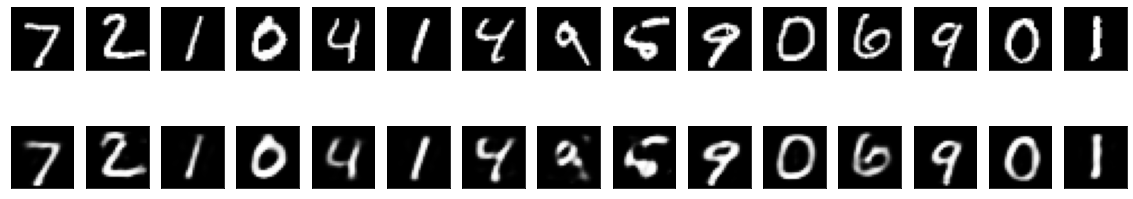

In [37]:
import matplotlib.pyplot as plt

n = 15 #number of images to display
plt.figure(figsize=(20,4))
for i in range(n):
  #display original images
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #display reconstruced images
  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False) 

plt.show()

### Deep Autoencoder

In [51]:
input_img = keras.Input(shape=(784,))

#encoded and bottleneck layer
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

#decoded and output layers
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [53]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, shuffle = True, validation_data = (x_test, x_test))

Epoch 1/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2406 - val_loss: 0.1640
Epoch 2/100
235/235 [==============================] - 5s 21ms/step - loss: 0.1481 - val_loss: 0.1347
Epoch 3/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1298 - val_loss: 0.1236
Epoch 4/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1206 - val_loss: 0.1167
Epoch 5/100
235/235 [==============================] - 4s 19ms/step - loss: 0.1149 - val_loss: 0.1114
Epoch 6/100
235/235 [==============================] - 5s 20ms/step - loss: 0.1108 - val_loss: 0.1078
Epoch 7/100
235/235 [==============================] - 5s 20ms/step - loss: 0.1070 - val_loss: 0.1043
Epoch 8/100
235/235 [==============================] - 4s 19ms/step - loss: 0.1041 - val_loss: 0.1017
Epoch 9/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1018 - val_loss: 0.0997
Epoch 10/100
235/235 [==============================] - 4s 16ms/step - loss: 0.099

In [54]:
#encode and decode some digits from the test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
encoded_imgs.mean() #check the sparsity of encoded models

8.705996

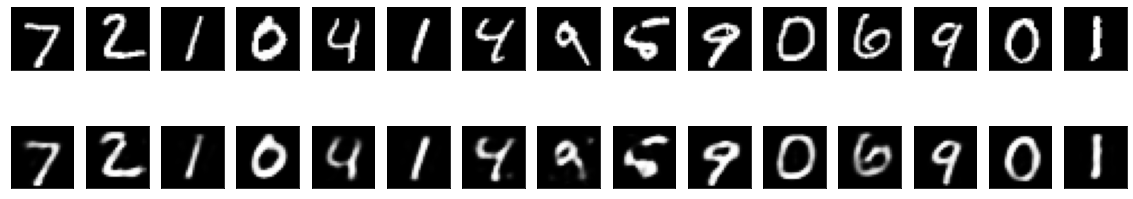

In [55]:
import matplotlib.pyplot as plt

n = 15 #number of images to display
plt.figure(figsize=(20,4))
for i in range(n):
  #display original images
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #display reconstruced images
  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False) 

plt.show()

### Convolutional Autoencoder

Usually, autoencoders applied to images are always convolutional autoencoders beacuse CNNs simply perform much better on images than NNs. The encoder will consist in a stack of Conv2D and MaxPooling2D layers (max pooling being used for spatial down-sampling), while the decoder will consist in a stack of Conv2D and UpSampling2D layers.

In [56]:
input_img = keras.Input(shape = (28, 28, 1))

x = layers.Conv2D(16, (3,3), activation = 'relu', padding = 'same')(input_img)
x = layers.MaxPooling2D((2, 2), padding = 'same')(x)
x = layers.Conv2D(8, (3,3), activation = 'relu', padding = 'same')(x)
x = layers.MaxPooling2D((2, 2), padding = 'same')(x)
x = layers.Conv2D(8, (3,3), activation = 'relu', padding = 'same')(x)
encoded = layers.MaxPooling2D((2, 2), padding = 'same')(x)

#Now the representation is (4, 4, 8), i.e 128-dimensional

x = layers.Conv2D(8, (3,3), activation = 'relu', padding = 'same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3,3), activation = 'relu', padding = 'same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3,3), activation = 'relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation = 'sigmoid', padding = 'same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [59]:
#we would use the original mnist data set with shape (samples, 3, 28, 28) and normalize it between 0 and 1

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [14]:
# open up a terminal and start a TensorBoard server that will read logs stored at /tmp/autoencoder
%tensorboard --logdir logs
%tensorboard --logdir=/tmp/autoencoder

UsageError: Line magic function `%tensorboard` not found.


In [64]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/50
469/469 [==============================] - 85s 178ms/step - loss: 0.2176 - val_loss: 0.1525
Epoch 2/50
469/469 [==============================] - 82s 176ms/step - loss: 0.1426 - val_loss: 0.1337
Epoch 3/50
469/469 [==============================] - 83s 176ms/step - loss: 0.1296 - val_loss: 0.1233
Epoch 4/50
469/469 [==============================] - 82s 175ms/step - loss: 0.1215 - val_loss: 0.1181
Epoch 5/50
469/469 [==============================] - 82s 176ms/step - loss: 0.1169 - val_loss: 0.1138
Epoch 6/50
469/469 [==============================] - 84s 178ms/step - loss: 0.1139 - val_loss: 0.1112
Epoch 7/50
469/469 [==============================] - 82s 176ms/step - loss: 0.1116 - val_loss: 0.1093
Epoch 8/50
469/469 [==============================] - 84s 178ms/step - loss: 0.1099 - val_loss: 0.1080
Epoch 9/50
469/469 [==============================] - 82s 176ms/step - loss: 0.1086 - val_loss: 0.1069
Epoch 10/50
469/469 [==============================] - 82s 175ms/step - l

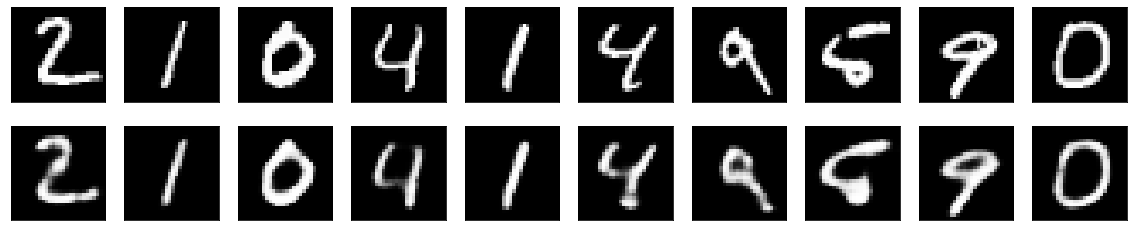

In [65]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Application of variational encoder in image denoising 

In [7]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#load dataset
(x_train, _), (x_test, _) = mnist.load_data()

#normalize and reshape data
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

#add noise to data
x_train_noisy = x_train + 0.5 * np.random.normal(loc=0, scale = 1, size = x_train.shape)
x_test_noisy = x_test + 0.5 * np.random.normal(loc=0, scale = 1, size = x_test.shape)

#fix the limit of values between 0 and 1. values smaller than 0 become 0, and values larger than 1 become 1
x_train_noisy = np.clip(x_train_noisy, 0, 1)
x_test_noisy = np.clip(x_test_noisy, 0, 1)

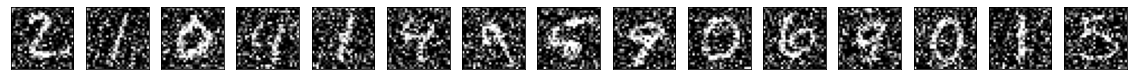

In [8]:
#display the first 15 digits

n = 15
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [13]:
input_img = keras.Input(shape = (28, 28, 1))

x = layers.Conv2D(32, (3,3), activation = 'relu', padding = 'same')(input_img)
x = layers.MaxPooling2D((2, 2), padding = 'same')(x)
x = layers.Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

#Now the representation is (7, 7, 32)

x = layers.Conv2D(32, (3,3), activation = 'relu', padding = 'same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation = 'sigmoid', padding = 'same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')


In [16]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 149s 317ms/step - loss: 0.1519 - val_loss: 0.0921
Epoch 2/100
469/469 [==============================] - 149s 317ms/step - loss: 0.1128 - val_loss: 0.0859
Epoch 3/100
469/469 [==============================] - 149s 317ms/step - loss: 0.1076 - val_loss: 0.0851
Epoch 4/100
469/469 [==============================] - 148s 316ms/step - loss: 0.1047 - val_loss: 0.0821
Epoch 5/100
469/469 [==============================] - 148s 315ms/step - loss: 0.1027 - val_loss: 0.0814
Epoch 6/100
469/469 [==============================] - 147s 314ms/step - loss: 0.1014 - val_loss: 0.0791
Epoch 7/100
469/469 [==============================] - 144s 308ms/step - loss: 0.1004 - val_loss: 0.0786
Epoch 8/100
469/469 [==============================] - 149s 318ms/step - loss: 0.0995 - val_loss: 0.0775
Epoch 9/100
469/469 [==============================] - 151s 323ms/step - loss: 0.0989 - val_loss: 0.0768
Epoch 10/100
469/469 [==============================] -

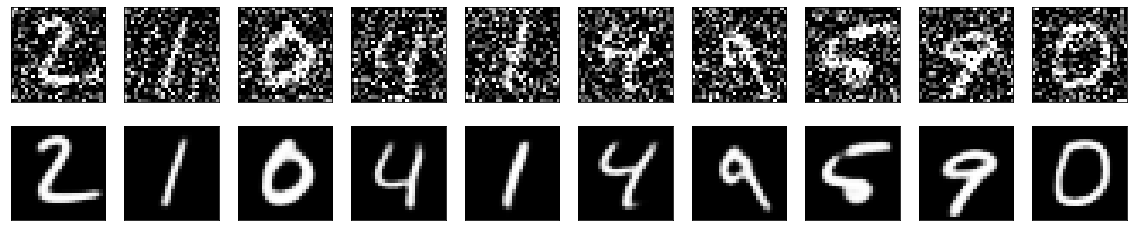

In [17]:
#PRINT THE NOISY AND DENOISED IMAGES

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display Denoised
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
